In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
?read_csv

![](https://github.com/mgruddy/Intro_Data_ScienceR_Spring2021/blob/main/Slides/Screenshots/avocadocsv.png?raw=true)

- A common method of storing tabular data is in .csv files or .txt files with **C**omma-**S**eparated **V**alues.
- Excel can open and export .csv files.
- The command ```read_csv()``` takes as input the *path* to .csv as a string, and outputs a tibble.
- The function will output the list of column names and its best guess as to their *type*.

In [3]:
avocados <- read_csv("data/avocado.csv")
print(avocados)

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  Date = col_date(format = ""),
  AveragePrice = col_double(),
  `Total Volume` = col_double(),
  `4046` = col_double(),
  `4225` = col_double(),
  `4770` = col_double(),
  `Total Bags` = col_double(),
  `Small Bags` = col_double(),
  `Large Bags` = col_double(),
  `XLarge Bags` = col_double(),
  type = col_character(),
  year = col_double(),
  region = col_character()
)




# A tibble: 18,249 x 14
      X1 Date       AveragePrice `Total Volume` `4046`  `4225` `4770`
   <dbl> <date>            <dbl>          <dbl>  <dbl>   <dbl>  <dbl>
 1     0 2015-12-27         1.33         64237.  1037.  54455.   48.2
 2     1 2015-12-20         1.35         54877.   674.  44639.   58.3
 3     2 2015-12-13         0.93        118220.   795. 109150.  130. 
 4     3 2015-12-06         1.08         78992.  1132   71976.   72.6
 5     4 2015-11-29         1.28         51040.   941.  43838.   75.8
 6     5 2015-11-22         1.26         55980.  1184.  48068.   43.6
 7     6 2015-11-15         0.99         83454.  1369.  73673.   93.3
 8     7 2015-11-08         0.98        109428.   704. 101815.   80  
 9     8 2015-11-01         1.02         99811.  1022.  87316.   85.3
10     9 2015-10-25         1.07         74339.   842.  64757.  113  
# … with 18,239 more rows, and 7 more variables: Total Bags <dbl>,
#   Small Bags <dbl>, Large Bags <dbl>, XLarge Bags <dbl>, type <chr>

![](https://github.com/mgruddy/Intro_Data_ScienceR_Spring2021/blob/main/Slides/Screenshots/avocado_extra_data.png?raw=true)

- Often there is additional meta-data at the beginning of the .csv file.
- We can skip lines with the ```skip``` option or ignore lines that start with a certain value using ```comment```.

In [4]:
# it thinks there is one column because there are no commas on the first line
# it gets upset when it finds 14 columns on other lines
read_csv("data/avocado_with_header.csv") %>%
  print()


── Column specification ────────────────────────────────────────────────────────
cols(
  `#This is a file with avocado prices` = col_double()
)


Warning message:
“18250 parsing failures.
row col  expected     actual                           file
  1  -- 1 columns 14 columns 'data/avocado_with_header.csv'
  2  -- 1 columns 14 columns 'data/avocado_with_header.csv'
  3  -- 1 columns 14 columns 'data/avocado_with_header.csv'
  4  -- 1 columns 14 columns 'data/avocado_with_header.csv'
  5  -- 1 columns 14 columns 'data/avocado_with_header.csv'
... ... ......... .......... ..............................
See problems(...) for more details.
”


# A tibble: 18,250 x 1
   `#This is a file with avocado prices`
                                   <dbl>
 1                                    NA
 2                                     0
 3                                     1
 4                                     2
 5                                     3
 6                                     4
 7                                     5
 8                                     6
 9                                     7
10                                     8
# … with 18,240 more rows


In [5]:
read_csv("data/avocado_with_header.csv", skip = 1) %>%
  print()

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  Date = col_date(format = ""),
  AveragePrice = col_double(),
  `Total Volume` = col_double(),
  `4046` = col_double(),
  `4225` = col_double(),
  `4770` = col_double(),
  `Total Bags` = col_double(),
  `Small Bags` = col_double(),
  `Large Bags` = col_double(),
  `XLarge Bags` = col_double(),
  type = col_character(),
  year = col_double(),
  region = col_character()
)




# A tibble: 18,249 x 14
      X1 Date       AveragePrice `Total Volume` `4046`  `4225` `4770`
   <dbl> <date>            <dbl>          <dbl>  <dbl>   <dbl>  <dbl>
 1     0 2015-12-27         1.33         64237.  1037.  54455.   48.2
 2     1 2015-12-20         1.35         54877.   674.  44639.   58.3
 3     2 2015-12-13         0.93        118220.   795. 109150.  130. 
 4     3 2015-12-06         1.08         78992.  1132   71976.   72.6
 5     4 2015-11-29         1.28         51040.   941.  43838.   75.8
 6     5 2015-11-22         1.26         55980.  1184.  48068.   43.6
 7     6 2015-11-15         0.99         83454.  1369.  73673.   93.3
 8     7 2015-11-08         0.98        109428.   704. 101815.   80  
 9     8 2015-11-01         1.02         99811.  1022.  87316.   85.3
10     9 2015-10-25         1.07         74339.   842.  64757.  113  
# … with 18,239 more rows, and 7 more variables: Total Bags <dbl>,
#   Small Bags <dbl>, Large Bags <dbl>, XLarge Bags <dbl>, type <chr>

In [6]:
# this is skip any line that begins with "#"
read_csv("data/avocado_with_header.csv", comment = "#") %>%
  print()

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  Date = col_date(format = ""),
  AveragePrice = col_double(),
  `Total Volume` = col_double(),
  `4046` = col_double(),
  `4225` = col_double(),
  `4770` = col_double(),
  `Total Bags` = col_double(),
  `Small Bags` = col_double(),
  `Large Bags` = col_double(),
  `XLarge Bags` = col_double(),
  type = col_character(),
  year = col_double(),
  region = col_character()
)




# A tibble: 18,249 x 14
      X1 Date       AveragePrice `Total Volume` `4046`  `4225` `4770`
   <dbl> <date>            <dbl>          <dbl>  <dbl>   <dbl>  <dbl>
 1     0 2015-12-27         1.33         64237.  1037.  54455.   48.2
 2     1 2015-12-20         1.35         54877.   674.  44639.   58.3
 3     2 2015-12-13         0.93        118220.   795. 109150.  130. 
 4     3 2015-12-06         1.08         78992.  1132   71976.   72.6
 5     4 2015-11-29         1.28         51040.   941.  43838.   75.8
 6     5 2015-11-22         1.26         55980.  1184.  48068.   43.6
 7     6 2015-11-15         0.99         83454.  1369.  73673.   93.3
 8     7 2015-11-08         0.98        109428.   704. 101815.   80  
 9     8 2015-11-01         1.02         99811.  1022.  87316.   85.3
10     9 2015-10-25         1.07         74339.   842.  64757.  113  
# … with 18,239 more rows, and 7 more variables: Total Bags <dbl>,
#   Small Bags <dbl>, Large Bags <dbl>, XLarge Bags <dbl>, type <chr>

![](https://github.com/mgruddy/Intro_Data_ScienceR_Spring2021/blob/main/Slides/Screenshots/avocado_no_headers.png?raw=true)

- If there are no column names we can either turn off column names, or write our own!

In [7]:
read_csv("data/avocado_no_names.csv", col_names = FALSE) %>%
  print()


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  X2 = col_date(format = ""),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_character(),
  X13 = col_double(),
  X14 = col_character()
)




# A tibble: 18,249 x 14
      X1 X2            X3      X4    X5      X6    X7     X8     X9   X10   X11
   <dbl> <date>     <dbl>   <dbl> <dbl>   <dbl> <dbl>  <dbl>  <dbl> <dbl> <dbl>
 1     0 2015-12-27  1.33  64237. 1037.  54455.  48.2  8697.  8604.  93.2     0
 2     1 2015-12-20  1.35  54877.  674.  44639.  58.3  9506.  9408.  97.5     0
 3     2 2015-12-13  0.93 118220.  795. 109150. 130.   8145.  8042. 103.      0
 4     3 2015-12-06  1.08  78992. 1132   71976.  72.6  5811.  5677. 134.      0
 5     4 2015-11-29  1.28  51040.  941.  43838.  75.8  6184.  5986. 198.      0
 6     5 2015-11-22  1.26  55980. 1184.  48068.  43.6  6684.  6556. 127.      0
 7     6 2015-11-15  0.99  83454. 1369.  73673.  93.3  8319.  8197. 122.      0
 8     7 2015-11-08  0.98 109428.  704. 101815.  80    6829.  6267. 562.      0
 9     8 2015-11-01  1.02  99811. 1022.  87316.  85.3 11388. 11105. 284.      0
10     9 2015-10-25  1.07  74339.  842.  64757. 113    8626.  8061. 564.      0
# … with 18,239 

In [8]:
read_csv("data/avocado_no_names.csv",
    col_names = c("a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n")) %>%
    print()


── Column specification ────────────────────────────────────────────────────────
cols(
  a = col_double(),
  b = col_date(format = ""),
  c = col_double(),
  d = col_double(),
  e = col_double(),
  f = col_double(),
  g = col_double(),
  h = col_double(),
  i = col_double(),
  j = col_double(),
  k = col_double(),
  l = col_character(),
  m = col_double(),
  n = col_character()
)




# A tibble: 18,249 x 14
       a b              c       d     e       f     g      h      i     j     k
   <dbl> <date>     <dbl>   <dbl> <dbl>   <dbl> <dbl>  <dbl>  <dbl> <dbl> <dbl>
 1     0 2015-12-27  1.33  64237. 1037.  54455.  48.2  8697.  8604.  93.2     0
 2     1 2015-12-20  1.35  54877.  674.  44639.  58.3  9506.  9408.  97.5     0
 3     2 2015-12-13  0.93 118220.  795. 109150. 130.   8145.  8042. 103.      0
 4     3 2015-12-06  1.08  78992. 1132   71976.  72.6  5811.  5677. 134.      0
 5     4 2015-11-29  1.28  51040.  941.  43838.  75.8  6184.  5986. 198.      0
 6     5 2015-11-22  1.26  55980. 1184.  48068.  43.6  6684.  6556. 127.      0
 7     6 2015-11-15  0.99  83454. 1369.  73673.  93.3  8319.  8197. 122.      0
 8     7 2015-11-08  0.98 109428.  704. 101815.  80    6829.  6267. 562.      0
 9     8 2015-11-01  1.02  99811. 1022.  87316.  85.3 11388. 11105. 284.      0
10     9 2015-10-25  1.07  74339.  842.  64757. 113    8626.  8061. 564.      0
# … with 18,239 

In [10]:
# we can also read inline text using read_csv
read_csv("a,b,c
1,2,3
1,4,9")

a,b,c
<dbl>,<dbl>,<dbl>
1,2,3
1,4,9


In [11]:
# the variable inline_text is a string where \n represents a new line
inline_text <- "a, b, c
1, 2, 3
1, 4, 9"
inline_text

[1] "a, b, c\n1, 2, 3\n1, 4, 9"

In [12]:
# these are equivalent
read_csv(inline_text)
read_csv("a,b,c\n1,2,3\n1,4,9")

a,b,c
<dbl>,<dbl>,<dbl>
1,2,3
1,4,9


a,b,c
<dbl>,<dbl>,<dbl>
1,2,3
1,4,9


In [13]:
read_csv("#some meta_data
a, b, c
1, 2, 3
#some more meta_data
1, 4, 9", comment = "#")

a,b,c
<dbl>,<dbl>,<dbl>
1,2,3
1,4,9


We can tweak what ```read_csv``` interprets as a missing value

In [14]:
read_csv("a,b,c\n1,2,.", na = ".")

a,b,c
<dbl>,<dbl>,<lgl>
1,2,NA


In [20]:
read_csv("a,b,c
1,2,3
4,5,None", na = "None")

a,b,c
<dbl>,<dbl>,<dbl>
1,2,3
4,5,NA


In [18]:
read_csv("a,b,c
1,2,NA")

a,b,c
<dbl>,<dbl>,<lgl>
1,2,NA


Attempt
- Run the two following lines

```read_csv("a,b\n1,2,3\n4,5,6")```

```read_csv("a,b,c\n1,2\n1,2,3,4")```
- What happened? Why?
- Alter them so that you don't get any errors

In [25]:
read_csv("a,b,c\n1,2,3\n4,5,6")

a,b,c
<dbl>,<dbl>,<dbl>
1,2,3
4,5,6


In [24]:
read_csv("a,b\n1,2,3\n4,5,6", skip = 1, col_names=FALSE)

X1,X2,X3
<dbl>,<dbl>,<dbl>
1,2,3
4,5,6


In [28]:
read_csv("a,b,c,d
1,2,3,4
1,2,3,4")

a,b,c,d
<dbl>,<dbl>,<dbl>,<dbl>
1,2,3,4
1,2,3,4


In [29]:
?read_delim

```read_csv()``` is equivalent to ```read_delim(, delim = ",")```

Sometimes tabular data is not separated by commas.
- The command ```read_csv2()``` reads semicolon separated files (common where ```,``` is used as the decimal place)
- The command ```read_tsv``` reads **t**ab delimited files
- The command ```read_delim()``` read in files with any delimiter
 * The other commands are really special cases of ```read_delim()```!
- The command ```read_fwf()``` reads in **f**ixed **w**idth **f**iles

In [35]:
# here \t represents tab-space
read_tsv("a\tb\tc
1\t2\t3")

a,b,c
<dbl>,<dbl>,<dbl>
1,2,3


In [30]:
read_delim("a | b | c
            1 | 2 | 3", delim = "|")

a,b,c
<chr>,<chr>,<chr>
1,2,3


In [36]:
fwf_sample <- readr_example("fwf-sample.txt")
writeLines(read_lines(fwf_sample))
read_fwf(fwf_sample, fwf_empty(fwf_sample, col_names = c("first", "last", "state", "ssn")))

John Smith          WA        418-Y11-4111
Mary Hartford       CA        319-Z19-4341
Evan Nolan          IL        219-532-c301



── Column specification ────────────────────────────────────────────────────────
cols(
  first = col_character(),
  last = col_character(),
  state = col_character(),
  ssn = col_character()
)




first,last,state,ssn
<chr>,<chr>,<chr>,<chr>
John,Smith,WA,418-Y11-4111
Mary,Hartford,CA,319-Z19-4341
Evan,Nolan,IL,219-532-c301


We can also just read lines from a txt file directly

![](https://github.com/mgruddy/Intro_Data_ScienceR_Spring2021/blob/main/Slides/Screenshots/emailtxt.png?raw=true)

- The command ```read_lines()``` outputs a character vector where the elements are the lines of the .txt file as strings
- The command ```writeLines()``` is a nice way to print out a character vector of lines from a document

In [39]:
read_lines("data/email.txt")

[1] "Dear Michael,"                                                                                                                                                                                                                                                                                                                 
[2] ""                                                                                                                                                                                                                                                                                                                              
[3] "You are receiving this communication because you may have recordings from Zoom meetings held between Jan. 1, 2018–June 30, 2020 stored in Zoom cloud storage. These recordings will be deleted on Thursday, March 4 at 12:01 a.m. You may choose to retain any or all of these recordings by saving them in your Google Drive."
[4] ""                                                                                                                                                                                                                                                                                                                              
[5] "You may have received a similar message regarding earlier Zoom recordings. Please note today’s message is regarding recordings made on different dates than those mentioned in the previous message."                                                                                                                          
[6] ""                                                                                                                                                                                                                                                                                                                              
[7] "Read on for more information, including instructions to review and retain your recordings."

In [40]:
writeLines(read_lines("data/email.txt"))

Dear Michael,

You are receiving this communication because you may have recordings from Zoom meetings held between Jan. 1, 2018–June 30, 2020 stored in Zoom cloud storage. These recordings will be deleted on Thursday, March 4 at 12:01 a.m. You may choose to retain any or all of these recordings by saving them in your Google Drive.

You may have received a similar message regarding earlier Zoom recordings. Please note today’s message is regarding recordings made on different dates than those mentioned in the previous message.

Read on for more information, including instructions to review and retain your recordings.


In [41]:
# this is useful for seeing the meta-data of a document
writeLines(read_lines("data/avocado_with_header.csv", n_max = 5))

#This is a file with avocado prices
,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.7,109149.67,130.5,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [ ]:
# recall we can save tibbles as csv files
write_csv(avocados, "data/avocado.csv")

- Note: when we save a tibble as a csv file we lose all the meta-data (when re-reading the file, it will guess the column types again)
- We can save tibbles as other types of files such as
 * .RDS which is a custom format for R. Use the commands ```saveRDS()``` and ```readRDS()```
 * .feather using the library ```feather``` and the commands ```write_feather()``` and ```read_feather()```

- Each of these commands reads the first 1000 lines to guess the column type for each column
- This poses a problem for columns where the first 1000 lines have missing values
- You can parse the type using more lines or override this "guess" explicitly
- See Sections 11.3 - 11.4 in the text for more details

In [42]:
# built in challenge .csv file
challenge <- read_csv(readr_example("challenge.csv"))


── Column specification ────────────────────────────────────────────────────────
cols(
  x = col_double(),
  y = col_logical()
)


Warning message:
“1000 parsing failures.
 row col           expected     actual                                                                                file
1001   y 1/0/T/F/TRUE/FALSE 2015-01-16 '/Users/mruddy/opt/anaconda3/envs/base_R/lib/R/library/readr/extdata/challenge.csv'
1002   y 1/0/T/F/TRUE/FALSE 2018-05-18 '/Users/mruddy/opt/anaconda3/envs/base_R/lib/R/library/readr/extdata/challenge.csv'
1003   y 1/0/T/F/TRUE/FALSE 2015-09-05 '/Users/mruddy/opt/anaconda3/envs/base_R/lib/R/library/readr/extdata/challenge.csv'
1004   y 1/0/T/F/TRUE/FALSE 2012-11-28 '/Users/mruddy/opt/anaconda3/envs/base_R/lib/R/library/readr/extdata/challenge.csv'
1005   y 1/0/T/F/TRUE/FALSE 2020-01-13 '/Users/mruddy/opt/anaconda3/envs/base_R/lib/R/library/readr/extdata/challenge.csv'
.... ... .................. .......... ..................................................

In [43]:
print(challenge)

# A tibble: 2,000 x 2
       x y    
   <dbl> <lgl>
 1   404 NA   
 2  4172 NA   
 3  3004 NA   
 4   787 NA   
 5    37 NA   
 6  2332 NA   
 7  2489 NA   
 8  1449 NA   
 9  3665 NA   
10  3863 NA   
# … with 1,990 more rows


In [47]:
# print out the problem rows
problems(challenge) %>%
    print()

# A tibble: 1,000 x 5
     row col   expected       actual   file                                     
   <int> <chr> <chr>          <chr>    <chr>                                    
 1  1001 y     1/0/T/F/TRUE/… 2015-01… '/Users/mruddy/opt/anaconda3/envs/base_R…
 2  1002 y     1/0/T/F/TRUE/… 2018-05… '/Users/mruddy/opt/anaconda3/envs/base_R…
 3  1003 y     1/0/T/F/TRUE/… 2015-09… '/Users/mruddy/opt/anaconda3/envs/base_R…
 4  1004 y     1/0/T/F/TRUE/… 2012-11… '/Users/mruddy/opt/anaconda3/envs/base_R…
 5  1005 y     1/0/T/F/TRUE/… 2020-01… '/Users/mruddy/opt/anaconda3/envs/base_R…
 6  1006 y     1/0/T/F/TRUE/… 2016-04… '/Users/mruddy/opt/anaconda3/envs/base_R…
 7  1007 y     1/0/T/F/TRUE/… 2011-05… '/Users/mruddy/opt/anaconda3/envs/base_R…
 8  1008 y     1/0/T/F/TRUE/… 2020-07… '/Users/mruddy/opt/anaconda3/envs/base_R…
 9  1009 y     1/0/T/F/TRUE/… 2011-04… '/Users/mruddy/opt/anaconda3/envs/base_R…
10  1010 y     1/0/T/F/TRUE/… 2010-05… '/Users/mruddy/opt/anaconda3/envs/base_R…
# … wi

In [50]:
# force the column types
challenge <- read_csv(readr_example("challenge.csv"), 
  col_types = cols(
    x = col_double(),
    y = col_date()
  )
)
tail(challenge)

x,y
<dbl>,<date>
0.8052743,2019-11-21
0.1635163,2018-03-29
0.4719390,2014-08-04
0.7183186,2015-08-16
0.2698786,2020-02-04
0.6082372,2019-01-06


In [51]:
# try more than 1000 lines to guess type
challenge <- read_csv(readr_example("challenge.csv"), guess_max = 1001)


── Column specification ────────────────────────────────────────────────────────
cols(
  x = col_double(),
  y = col_date(format = "")
)




Fancier types of files can be imported such as
- ```haven``` reads SPSS, Stata, and SAS files
- ```readxl``` reads excel files (both ```.xls``` and ```.xlsx```)
- ```DBI``` lets you run SQL queries

We can also save our plots using ```ggsave()```!

In [52]:
mpg_plot <- mpg %>%
    ggplot(aes(x = cty, y = displ)) +
    geom_point()

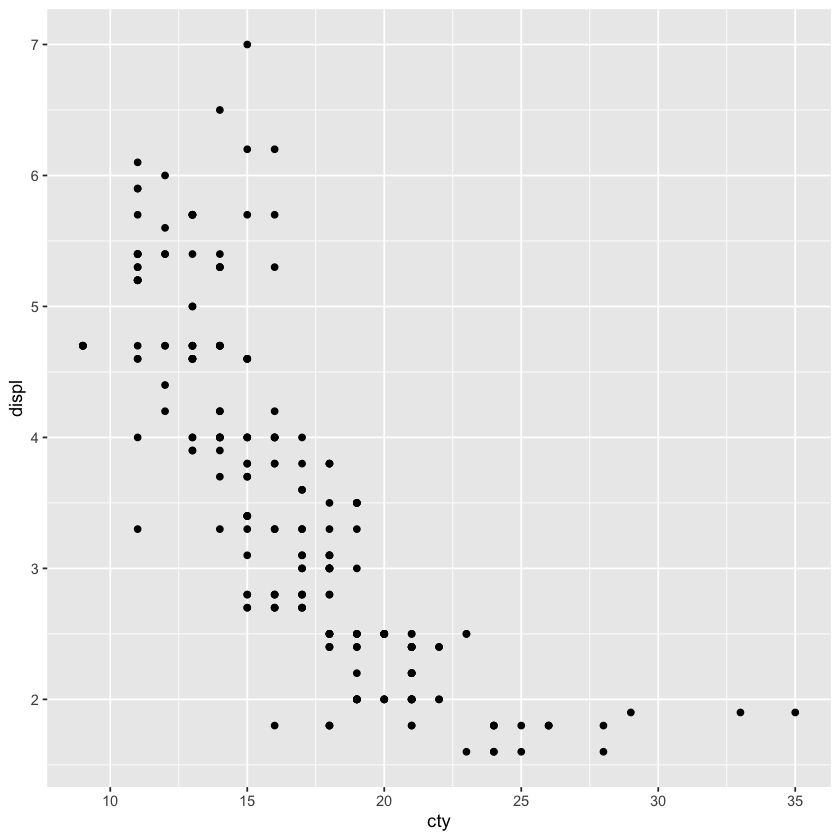

In [53]:
mpg_plot

In [54]:
ggsave("data/mpg_plot.png", plot = mpg_plot)

Saving 7 x 7 in image



In [55]:
?ggsave